# Canary Silver
## Creating an histogram from each of the sarifo rtb time series
(time,qps_cap,qps_eff,avg_lat,max_lat,timeouts,bids)

Parsing data from safirortb.log

In [68]:
!./get_logs.sh 172.18.5.120 600000
!./parse_logs.sh
!ls ../data/

metric.csv  safirortb.log


In [1]:
import numpy as np
import os
from stats_util import Type, get_serie
import math

path = os.getcwd()
path 
dataset = np.loadtxt(path + "/../data/metric.csv", delimiter=",")
dataset = np.delete(dataset, [1,], axis=1)
dataset

array([[2.01812112e+13, 5.77000000e+02, 3.11000000e+02, ...,
        8.33000000e-02, 1.00000000e+00, 7.00000000e+00],
       [2.01812112e+13, 5.43000000e+02, 2.68000000e+02, ...,
        7.52000000e-02, 1.00000000e+00, 1.50000000e+01],
       [2.01812112e+13, 5.11000000e+02, 2.07000000e+02, ...,
        7.39700000e-01, 2.00000000e+00, 6.00000000e+00],
       ...,
       [2.01812112e+13, 4.37000000e+02, 2.09000000e+02, ...,
        3.83000000e-02, 0.00000000e+00, 6.00000000e+00],
       [2.01812112e+13, 4.50000000e+02, 2.51000000e+02, ...,
        4.49000000e-02, 0.00000000e+00, 8.00000000e+00],
       [2.01812112e+13, 4.38000000e+02, 2.23000000e+02, ...,
        4.43000000e-02, 0.00000000e+00, 7.00000000e+00]])

In [3]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=180, facecolor='w', edgecolor='k')

<Figure size 2700x1260 with 0 Axes>

<Figure size 2700x1260 with 0 Axes>

(407.5448219402374, 89.39889736330007)

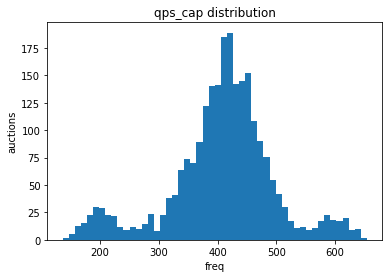

In [63]:
plt.hist(fn,bins=50)
plt.title('qps_cap distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),math.sqrt(fn.var())

(179.80270159639787, 73.20551511025731)

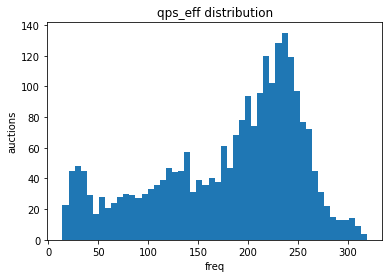

In [64]:
fn = get_serie(dataset, Type.qps_eff, None, None)
plt.hist(fn,bins=50)
plt.title('qps_eff distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),math.sqrt(fn.var())

(0.0026162505116659844, 0.0008175782791917633)

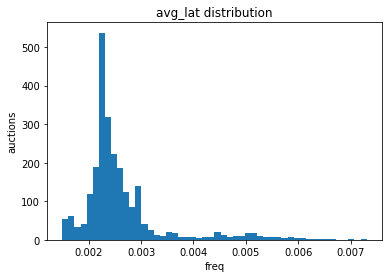

In [65]:
fn = get_serie(dataset, Type.avg_lat, None, None)
plt.hist(fn,bins=50)
plt.title('avg_lat distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),math.sqrt(fn.var())

(6.298403602128531, 4.618453427793156)

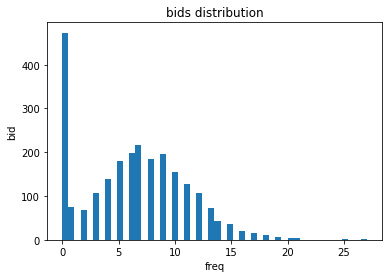

In [66]:
fn = get_serie(dataset, Type.bids, None, None)
plt.hist(fn,bins=50)
plt.title('bids distribution')
plt.xlabel('freq')
plt.ylabel('bid');
fn.mean(),math.sqrt(fn.var())

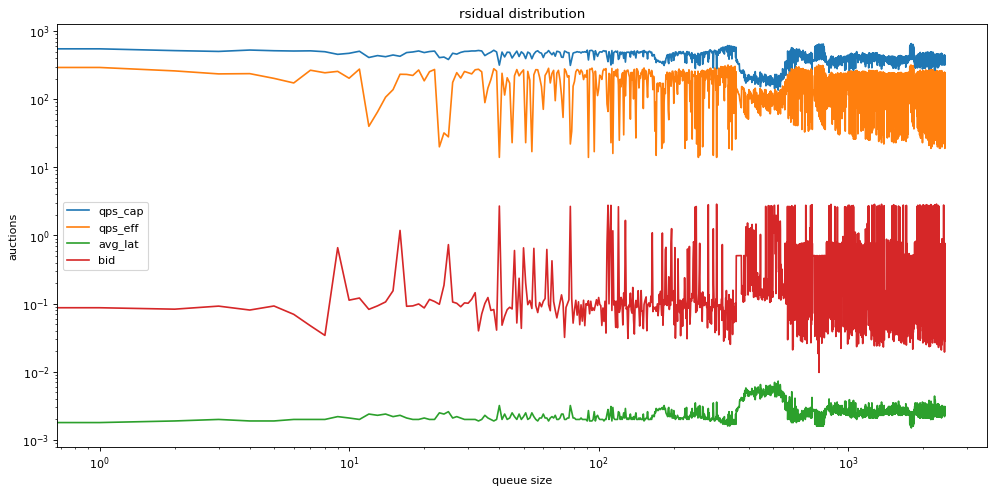

In [67]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(dataset[:,1], label="qps_cap")
plt.plot(dataset[:, 2], label="qps_eff")
plt.plot(dataset[:, 3], label="avg_lat")
plt.plot(dataset[:, 4], label="bid")

#plt.hist(dataset,bins=50)
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('rsidual distribution')
plt.xlabel('queue size')
plt.ylabel('auctions');
plt.legend()
plt.show()